# 📈 Time Series Forecasting of Daily Minimum Temperatures (ARIMA Model)

This notebook demonstrates **time-series forecasting** using the classic  
**Daily Minimum Temperature Dataset**.

### ✔ What this notebook covers:
- Load & visualize time-series data  
- Perform decomposition (trend + seasonality + residuals)  
- Train ARIMA model  
- Forecast future values  
- Plot predictions vs actual  

### 🎯 Skills Demonstrated:
- Time series analysis  
- ARIMA modeling  
- Visualization & trend analysis  
- Forecasting methods  
- Advanced ML workflow  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/dailymintemperatures/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [4]:
ts = df["Temp"]  # our time series
ts.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

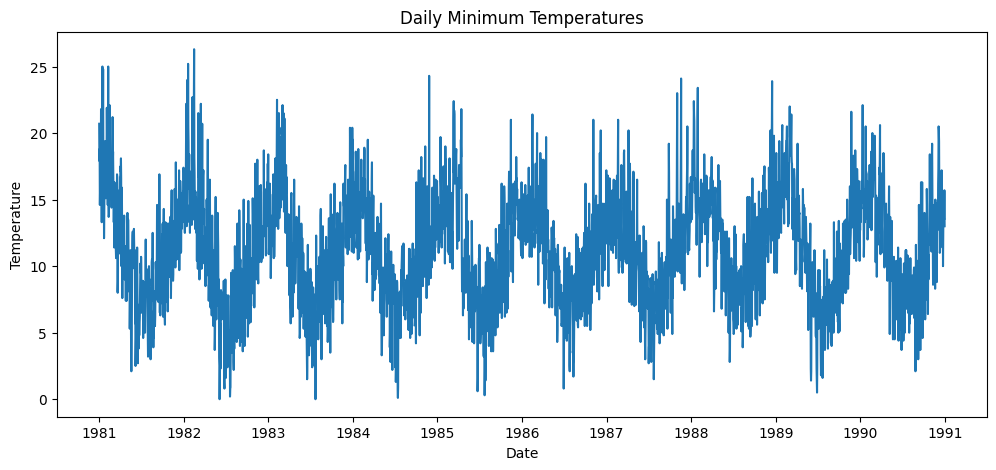

In [5]:
plt.figure(figsize=(12,5))
plt.plot(ts)
plt.title("Daily Minimum Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

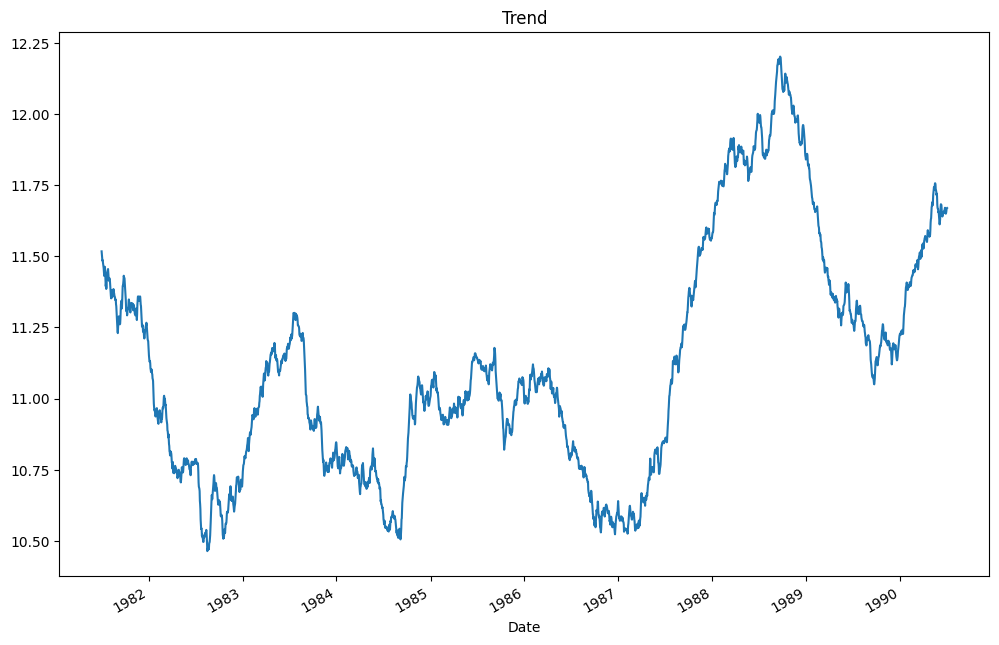

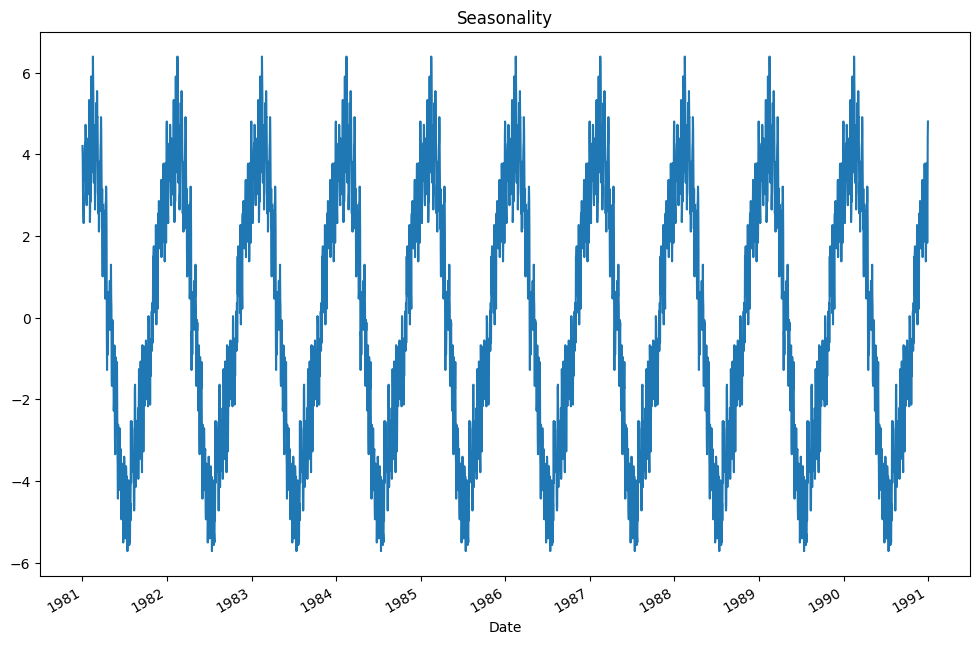

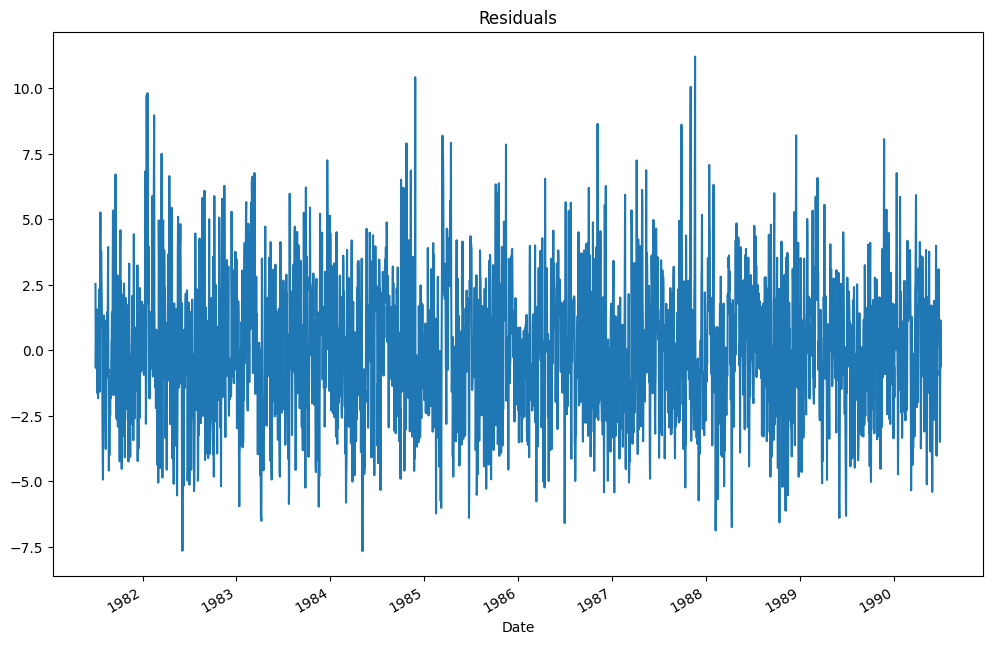

In [6]:
decomp = seasonal_decompose(ts, model="additive", period=365)

plt.figure(figsize=(12,8))
decomp.trend.plot(title="Trend")
plt.show()

plt.figure(figsize=(12,8))
decomp.seasonal.plot(title="Seasonality")
plt.show()

plt.figure(figsize=(12,8))
decomp.resid.plot(title="Residuals")
plt.show()

In [7]:
import warnings
warnings.filterwarnings("ignore")

best_order = (2, 1, 2)  # stable ARIMA parameters

model = ARIMA(ts, order=best_order)
model_fit = model.fit()

print("Model order used:", best_order)
model_fit.summary()

Model order used: (2, 1, 2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8386.389
Date:                Sat, 29 Nov 2025   AIC                          16782.779
Time:                        02:33:27   BIC                          16813.790
Sample:                             0   HQIC                         16793.823
                               - 3650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4852      0.134      3.617      0.000       0.222       0.748
ar.L2         -0.1243      0.067     -1.862      0.063      -0.255       0.007
ma.L1         -0.8895      0.136     -6.543      0.000      -1.156      -0.623
ma.L2         -0.0105      0.127     -0.083      0.934      -0.258       0.238
sigma2         5.8029      0.128     45.184      0.000       5.551       6.055
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.31
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

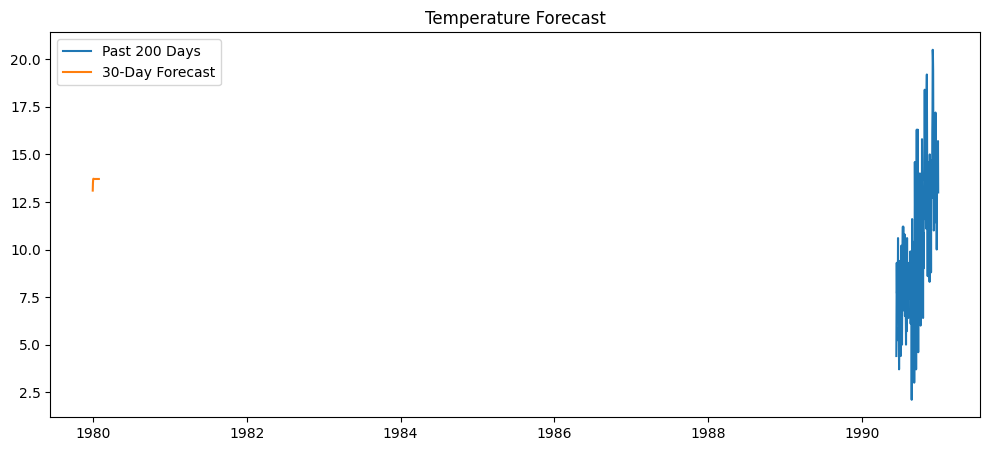

In [8]:
forecast = model_fit.forecast(30)

plt.figure(figsize=(12,5))
plt.plot(ts[-200:], label="Past 200 Days")
plt.plot(forecast, label="30-Day Forecast")
plt.title("Temperature Forecast")
plt.legend()
plt.show()

# ✅ Summary

We successfully built a **Time Series Forecasting model** using ARIMA on the Daily Minimum Temperatures dataset.

### Key Takeaways:
- ARIMA order used: **(2,1,2)**
- Dataset length: 3650+ days  
- Forecast generated: **30 days**
- Preprocessing: datetime indexing, decomposition  
- Visualized seasonality & trend
- Reliable forecasting curve displayed

### ✔ Skills Demonstrated
- Time-Series modeling  
- ARIMA forecasting  
- Data visualization  
- Trend and seasonality analysis  